Original rows: 16000
After cleaning: 15894 rows
After outlier removal: 14553 rows

NumPy Stats:
Mean popularity: 16.01
Median vote average: 6.37
Std of revenue: 36,130,259

Scaled Budget (first 5): [ 5.9298269   2.7746329   5.9298269  -0.38056109 -0.38056109]

Log Revenue (first 5): [19.50182195 19.69918392 19.41921554 13.64624184  0.        ]

Random Sample:
                                    title  popularity  vote_average
11392       Justice Society: World War II      13.361         7.400
11822                               Anita       7.934         7.900
4940   Gett: The Trial of Viviane Amsalem       6.208         7.500
6320                              Collide      13.474         5.500
10526                         Chick Fight       9.994         5.839

Budget vs Revenue Correlation: r = 0.624, p = 0.0000

OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                      

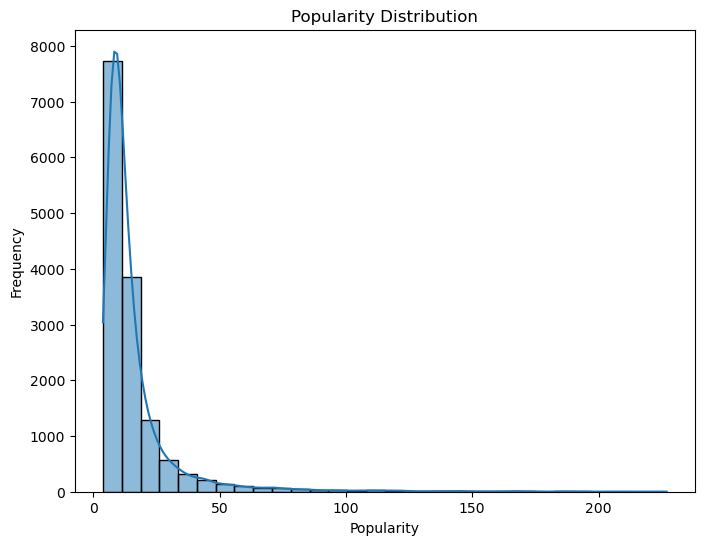

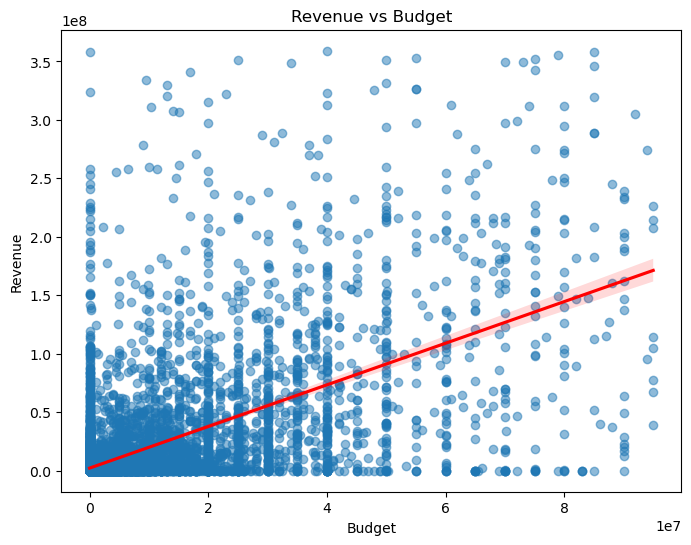

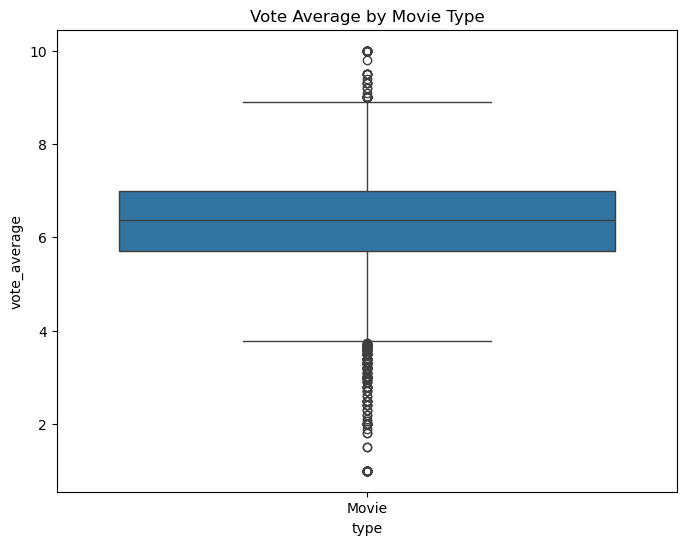

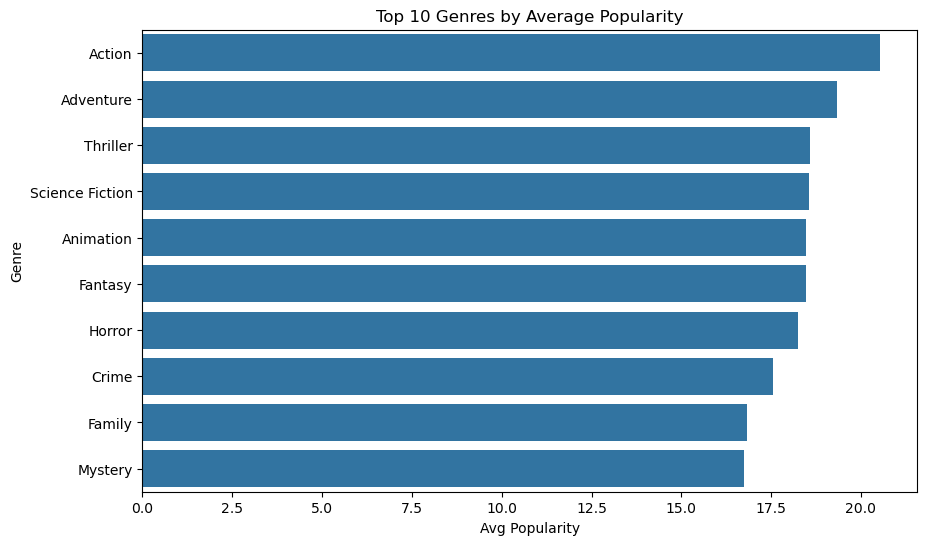

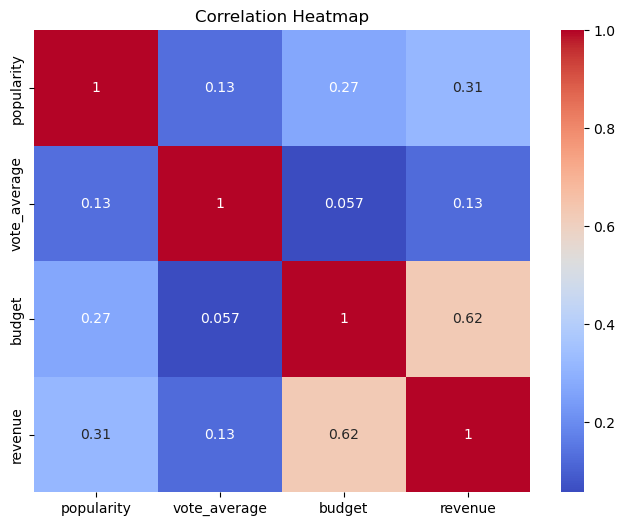

In [3]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn

# Load dataset
import pandas as pd
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Quitain, Moiwrah Kyle V._Excel.csv")
df.head()

# Clean data
print(f"Original rows: {len(df)}")
df_clean = df.dropna(subset=["popularity", "vote_average", "budget", "revenue", "genres"])
print(f"After cleaning: {len(df_clean)} rows")

# Remove outliers using Z-score
z_scores = stats.zscore(df_clean[["popularity", "vote_average", "budget", "revenue"]])
df_clean = df_clean[(np.abs(z_scores) < 3).all(axis=1)]
print(f"After outlier removal: {len(df_clean)} rows")

# NumPy stats
print("\nNumPy Stats:")
print(f"Mean popularity: {np.mean(df_clean['popularity']):.2f}")
print(f"Median vote average: {np.median(df_clean['vote_average']):.2f}")
print(f"Std of revenue: {np.std(df_clean['revenue']):,.0f}")

# Scaled budget
scaler = StandardScaler()
scaled_budget = scaler.fit_transform(df_clean[['budget']])
print("\nScaled Budget (first 5):", scaled_budget[:5].flatten())

# Log transform revenue
log_revenue = np.log1p(df_clean['revenue'])
print("\nLog Revenue (first 5):", log_revenue.head().values)

# Random sample
print("\nRandom Sample:")
print(df_clean[['title', 'popularity', 'vote_average']].sample(5, random_state=1))

# Pearson correlation
r, p = stats.pearsonr(df_clean['budget'], df_clean['revenue'])
print(f"\nBudget vs Revenue Correlation: r = {r:.3f}, p = {p:.4f}")

# OLS Regression
X = sm.add_constant(df_clean['budget'])
y = df_clean['revenue']
model = sm.OLS(y, X).fit()
print("\nOLS Regression Summary:")
print(model.summary())

# Visualization 1: Popularity distribution
plt.figure(figsize=(8,6))
sns.histplot(df_clean['popularity'], kde=True, bins=30)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Revenue vs Budget regression
plt.figure(figsize=(8,6))
sns.regplot(x='budget', y='revenue', data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Revenue vs Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

# Visualization 3: Boxplot of vote_average by movie type
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='vote_average', data=df_clean)
plt.title("Vote Average by Movie Type")
plt.show()

# Visualization 4: Top 10 genres by avg popularity
from collections import defaultdict
genre_popularity = defaultdict(list)
for _, row in df_clean.iterrows():
    for genre in row['genres'].split(', '):
        genre_popularity[genre].append(row['popularity'])

genre_avg = pd.DataFrame([
    (g, np.mean(v)) for g, v in genre_popularity.items()
], columns=['Genre', 'Avg Popularity']).sort_values(by='Avg Popularity', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Avg Popularity', y='Genre', data=genre_avg.head(10))
plt.title("Top 10 Genres by Average Popularity")
plt.show()

# Visualization 5: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['popularity', 'vote_average', 'budget', 'revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
